<a href="https://colab.research.google.com/github/eldercamposds/demo_rede_neural/blob/main/Demonstra%C3%A7%C3%A3o_Rede_Neural_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstração de rede neural
![imagem_2023-12-06_001020399.png](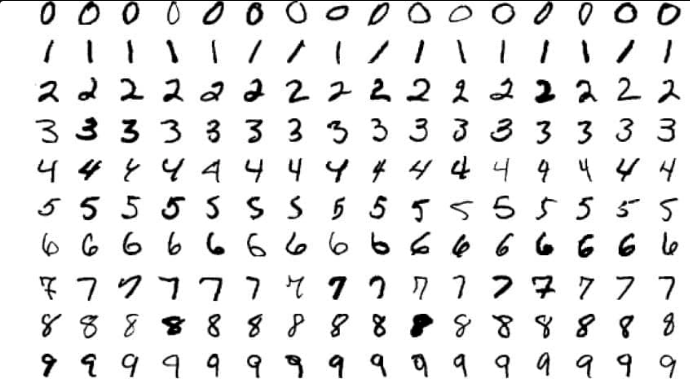![imagem_2023-12-06_001031071.png](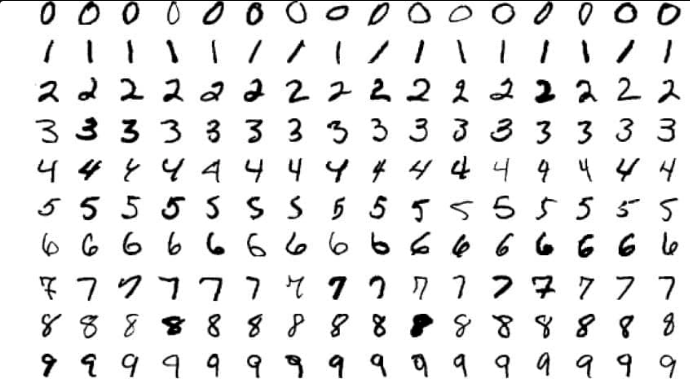![imagem_2023-12-06_001046702.png](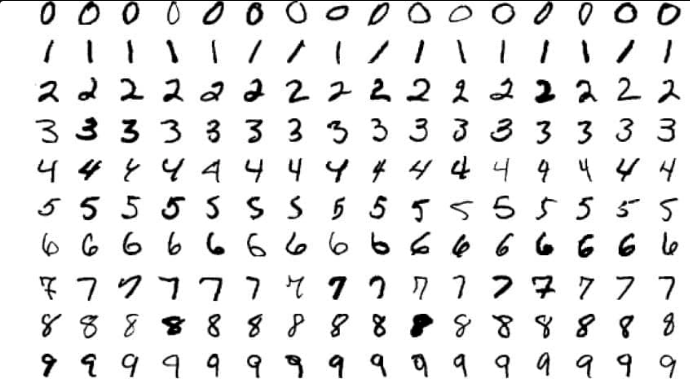![imagem_2023-12-06_001058398.png](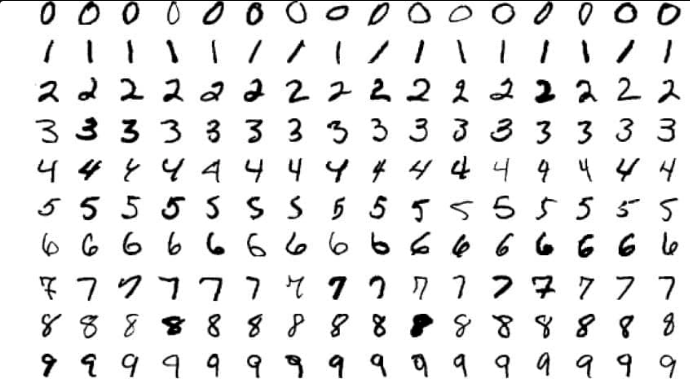![22.jpg](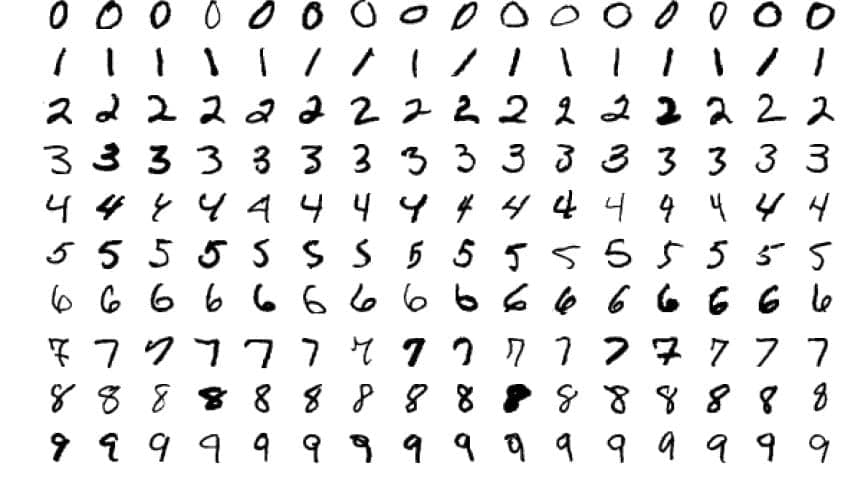![22.jpg](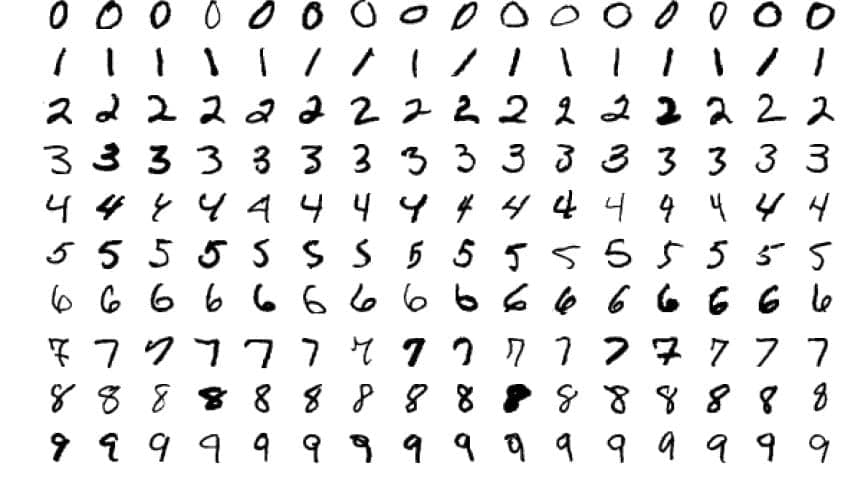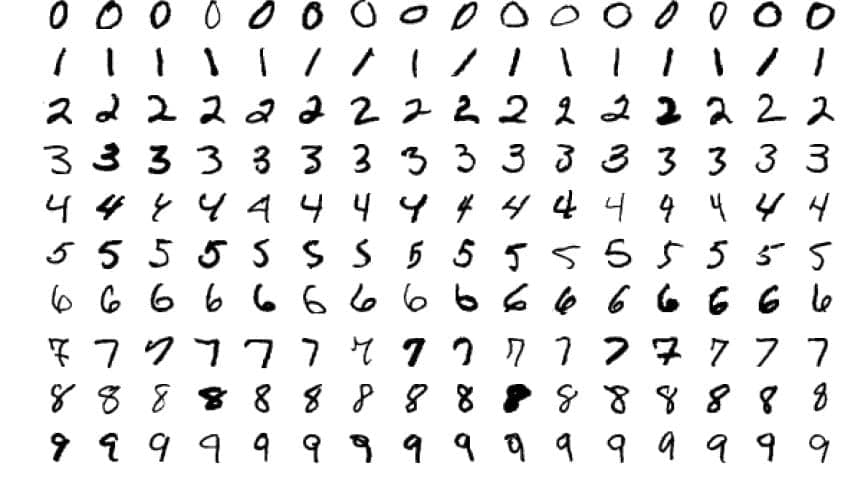))))))
> Para praticarmos os conhecimentos de redes neurais, especificamente, vamos usar o TensorFlow, que é uma biblioteca de código aberto para aprendizado de máquina e de cálculos em dados descentralizados.

> Essa descentralização deve-se ao fato de o Tensorflow poder ser rodado em apenas um único processador ou em múltiplos, seja do tipo CPU normal ou GPU com capacidades computacionais incríveis, uma vez que esse tipo de processador gráfico foi criado e aprimorado ao longo dos anos para lidar com multiplicações de matrizes e subproblemas derivados.

In [15]:
#intalando o TensorFlow
!pip install --upgrade tensorflow

In [16]:
#para finalizar a preparação, vamos instalar o keras
!pip install keras

>O Keras é uma biblioteca para desenvolvimento de redes neurais, projetada para permitir experimentação rápida. Ela oferece um conjunto de abstrações que serve de interface para outros frameworks de aprendizado de máquina, podendo rodar junto ao TensorFlow, Microsoft Cognitive Toolkit, Theano, PlaidML etc.

>O interessante do Keras são seus recursos, contando com métodos de construção de camadas, métodos de funções de ativação das mais variadas, funções de perda/custo diferentes, otimizadores de gradiente etc. Por ser uma biblioteca de código aberto, basta procurar sua documentação no Google ou entrar em seu repositório do Github, acompanhar as trilhas de discussão em caso de dúvidas e entrar em contato com os desenvolvedores.

>Assim, estamos preparados e vamos importar as bibliotecas necessárias à demonstração:

In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

###Na importação de bibliotecas e seus métodos, você deve ter percebido que:

* Trouxemos o Label Binarizer para regularizar as classes do nosso modelo.
* Importamos o Sequential, que é a base da construção de camadas.
* Importamos o Dense, que é o método de construção de camadas totalmente conectadas.
* Importamos o SGD (Stochastic Gradient Descent), que é o otimizador de gradiente descendente tradicional.

###Além desses métodos essenciais, cabe ressaltar que:

* Importamos o classification report, método que nos mostrará o resultado de nossa demonstração em detalhes (muito recomendado para o uso no dia a dia com problemas de classificação de um modo geral).
* Importamos o MNIST, que é o nosso conjunto de dados do qual falaremos mais adiante.
* Importamos o pyplot para visualizarmos a evolução do aprendizado no nosso modelo, bem como o numpy para regularizar o dimensionamento dos nossos dados.

> Agora, vamos baixar nosso conjunto de dados para experimentação.

Utilizaremos um dos conjuntos de dados mais conhecidos e usados na área de redes neurais: os conjuntos de dígitos escritos à mão do MNIST (Modified National Institute of Standards and Technology). A imagem a seguir mostra um dos 70.000 datasets de dígitos.



Basicamente, nossa rede neural vai aprender a reconhecer o
padrão de escrita de números. Para conseguirmos esse conjunto, vamos utilizar o seguinte bloco de código:

In [18]:
print('[INFO] accessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


Agora baixado, o conjunto já vem no formato de treinamento e teste, como podemos ver na declaração do bloco de código anterior, mas vamos precisar rearrumar o conjunto. Cada imagem do MNIST tem dimensões 28x28x1, mas, para a rede neural, vamos precisar chapar a imagem em 28x28=784 pixels.

>Em seguida, normalizaremos os dados para que fiquem entre 0 e 1, e faremos isso dividindo o conjunto por 255 (valor máximo de um pixel). Para isso, utilizaremos o código a seguir:

In [19]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

>Agora, para adequar a última camada, a de saída, vamos binarizar a classe da seguinte forma:

In [20]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

O LabelBinarizer faz com o que o resultado da classe se torne binário, ou seja, ao invés de lidarmos com a classe de valor 5, passaremos a lidar com 0000100000. Isso é importante, pois a camada final deve ter tamanho proporcional às possibilidades de resultados esperados. Vejamos outro exemplo: Se a rede classificasse animais em Gato, Cão ou Peixe, teríamos 001, 010, 100, respectivamente.

Essa prática é muito comum em problemas de classificação multiclasse, mas existe uma categoria que é a de multirótulos, em que os resultados podem ser de mais de uma classe ao mesmo tempo. Por exemplo, categorias de autores de livros (Terror, Ficção Científica, Romance) admitem que um livro seja de Terror e Ficção Científica, tendo a binarização 110. Para cada caso como esse, existe uma função de custo diferente.

>Agora, vamos definir a arquitetura da nossa rede neural.

Com a ajuda do Keras, isso pode ser feito de maneira simples, adicionando uma camada atrás da outra em sequência, conforme vemos a seguir:

In [21]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

Como podemos ver, a arquitetura seguirá este formato:


Uma camada de entrada de 784 nós, um para cada pixel da imagem em questão, que se conectará a uma camada oculta densa de 256 nós pela função de ativação da sigmoide.

Depois, a primeira camada oculta se conectará à segunda, de 128 nós, também por sigmoide.

Esta se conectará à última camada de predição com 10 nós conectados a partir da Softmax. São 10 nós, porque temos 10 possíveis dígitos.

Para treinar o modelo, vamos usar como otimizador do gradiente o SGD, aquele baseado no gradiente descendente, e com taxa de aprendizado 0.01. Também faremos uso da métrica de acurácia para acompanhar o modelo.

Para calcular a perda ou função de custo, vamos usar a entropia cruzada categórica (categorical_crossentropy), que é a mais utilizada em problemas de classificação.

>Agora, digitaremos o seguinte código:

Antes disso, entenda que para as épocas da nossa rede, vamos escolher 100 épocas, ou seja, a rede tem 100 iterações para convergir e apreender, e vamos apresentar lotes de 128 imagens cada por iteração. O código a seguir será para isso.

In [22]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 2.2745 - accuracy: 0.1993 - val_loss: 2.2356 - val_accuracy: 0.3954
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2006 - accuracy: 0.4166 - val_loss: 2.1563 - val_accuracy: 0.4712
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 2.1079 - accuracy: 0.5447 - val_loss: 2.0427 - val_accuracy: 0.6400
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 1.9720 - accuracy: 0.6121 - val_loss: 1.8772 - val_accuracy: 0.6054
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.7822 - accuracy: 0.6403 - val_loss: 1.6595 - val_accuracy: 0.6554
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.5567 - accuracy: 0.6728 - val_loss: 1.4292 - val_accuracy: 0.6624
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 1.3395 - accuracy: 0.7008 - val_loss: 1.2281 - val_accuracy: 0.725


>Neste ponto, basta digitar o seguinte bloco de código:

Isso porque agora chegou o momento de ver como nossa rede se saiu. Para tal, vamos utilizar a classification_report, uma função do sklearn que compara os valores preditos com os reais, passados como argumentos.

In [23]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.94      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.90      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



O resultado disso será um relatório de classificação. Como esse problema é multiclasse, além de mostrar a acurácia geral da classificação, o relatório apresentará o resultado de cada classe possível, assemelhando-se à imagem a seguir.

Para interpretarmos esse relatório, tenha em mente que cada linha da matriz principal é uma possível classe, cada coluna é uma métrica de acompanhamento (no caso, precisão, recall e medida F1), finalizando com suporte (ou cobertura, ou seja, quantos casos foram cobertos pelas métricas escolhidas).

Nas linhas de baixo, temos:

Acurácia geral:

  * Média de acertos do modelo ao tentar prever o alvo do problema. É classificada como geral, pois contabiliza o número de acertos sem levar em consideração a ponderação entre possíveis classes.

Média macro da acurácia:
  * Comparação a nível macro de acurácia para cada classe, feita sem considerar a distribuição da classe em relação às demais.

Média ponderada da acurácia:
  * Métrica que leva em consideração a distribuição das observações por classe em relação às demais.


>Para finalizar, vamos utilizar o seguinte bloco de código:

Saiba que com o código, a seguir, podemos ver como a rede evoluiu até chegar a essas métricas, ou seja, como a função de custo foi sendo otimizada e a acurácia foi subindo.

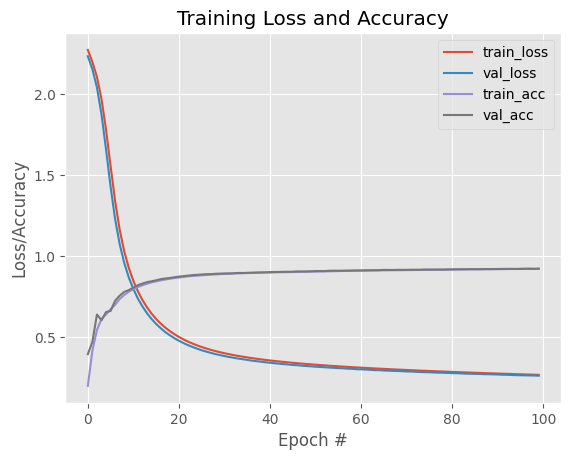

In [25]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend();

Esse código resultará no gráfico acima. Como podemos ver, o resultado da função de custo diminui à medida que as épocas passam, e a acurácia aumenta, o que é bastante intuitivo, pois a rede está aprendendo com o passar das épocas (iterações).

Retomando os conhecimentos teóricos sobre redes neurais, a cada época, a rede tenta um palpite nos seus pesos, de forma a diminuir a função custo e a distância entre a realidade e o predito.

Assim, reduz-se a função loss e aumenta-se um pouco a acurácia. Depois, na próxima rodada, o processo se repete, o otimizador do gradiente descendente gera um novo palpite, de modo a reduzir a função de custo até que ele seja mínimo ou que o número de épocas acabe. Por fim, teremos nosso modelo treinado e pronto para uso.